In [1]:
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_label = iris.target

print(pd.DataFrame(data=iris['data'], columns=iris['feature_names']))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [8]:
# 將資料分成training及testing，比例為8:2，並亂序
train_data, test_data, train_label, test_label = train_test_split(iris_data, iris_label, test_size=0.2, shuffle=True)

# 前處理，將所有特徵標準化，能夠有效地讓模型快速收斂
# StandardScaler使平均值為0，標準差為1，其他前處理MinMaxScaler:最小值為0最大值為1 MaxAbsScaler:將數據縮放到到[-1,1]之間
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [31]:
# 使用KNN演算法，k為5(測試過後k從3到30預測結果都一樣)
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_data,train_label)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# 輸出預測結果及正確結果
predicted = classifier.predict(test_data)
print('predicted:', predicted)
print('true:     ', test_label)

predicted: [1 1 1 2 1 1 1 1 0 2 2 0 0 0 2 1 2 0 1 2 1 1 1 1 2 0 2 0 0 1]
true:      [1 2 1 2 1 1 1 1 0 2 2 0 0 0 2 1 2 0 1 2 1 1 2 1 2 0 2 0 0 1]


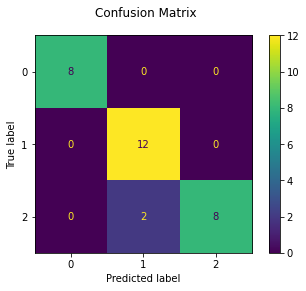

In [22]:
# 顯示混淆矩陣
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_label, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

In [16]:
# 顯示結果報表
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# f1-score= 2 * precision * recall/(recision + recall)，為precision和recall的harmonic mean調和平均數
# support為實際手寫數字的總數
print(f"Classification report for classifier {classifier}:\n"
   f"{metrics.classification_report(test_label, predicted)}\n"  )

Classification report for classifier KNeighborsClassifier(n_neighbors=7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.86      1.00      0.92        12
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30


